### Análise Exploratória de Dados

#### Conjunto de dados: Imdb

#### Preparação
 - Carregamento de bibliotecas
 - Configuração de estilo dos gráficos
 - Leitura do conjunto de dados

In [ ]:
import pandas as pd
from IPython.display import Markdown
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv("dados_imdb.csv")

#### Informações iniciais

In [2]:
display(Markdown("### Primeiras linhas"))
display(df.head())

display(Markdown("### Ultimas linhas"))
display(df.tail())

display(Markdown("### Informação das variáveis"))
df.info()

display(Markdown("### Quantidade de valores únicos"))
display(df.nunique())

display(Markdown("### Quantidade de valores ausentes"))
display(df.isna().sum())

display(Markdown("### Quantidade de duplicatas"))
display(df.duplicated().sum())

### Primeiras linhas

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


### Ultimas linhas

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
994,995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
995,996,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
996,997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
997,998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN
998,999,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN


### Informação das variáveis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


### Quantidade de valores únicos

Unnamed: 0       999
Series_Title     998
Released_Year    100
Certificate       16
Runtime          140
Genre            202
IMDB_Rating       16
Overview         999
Meta_score        63
Director         548
Star1            659
Star2            840
Star3            890
Star4            938
No_of_Votes      998
Gross            822
dtype: int64

### Quantidade de valores ausentes

Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

### Quantidade de duplicatas

0

### Tratamento de colunas

#### Retirando colunas inúteis

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

#### Tratando o tipo das colunas Released_Year, Runtime e Gross

In [4]:
#Convertendo a coluna para numérica, transformando erros em NaN
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
df['Released_Year'] = df['Released_Year'].astype('Int64')

#Transformando a coluna em string para que possa ser removido o "min"
df['Runtime'] = df['Runtime'].astype(str)
df['Runtime'] = df['Runtime'].str.replace(' min', '')
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce') #convertendo para numérico

#Retirando as vírgulas e transformando em numérico
df['Gross'] = df['Gross'].astype(str).str.replace(',', '', regex=False)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

#### Tratando valores nulos nas colunas Meta_score e Gross

In [5]:
mediana_meta_score = df['Meta_score'].median()
mediana_gross = df['Gross'].median()

#Preenchendo valores nulos da coluna com a mediana
df['Meta_score'] = df['Meta_score'].fillna(mediana_meta_score)
df['Gross'] = df['Gross'].fillna(mediana_gross)

#### Tratando a coluna Certificate

In [6]:
contagem_valores = df['Certificate'].value_counts()
print(contagem_valores)

Certificate
U           234
A           196
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: count, dtype: int64


In [7]:
# Tratando a coluna Certificate
padronizacao = {
    'U': 'Universal',
    'UA': 'Orientação Parental',
    'U/A': 'Orientação Parental',
    'PG': 'Orientação Parental',
    'PG-13': 'Orientação Parental',
    'A': 'Adultos',
    'R': 'Adultos',
    'Passed': 'Universal',
    'Approved': 'Universal',
    'G': 'Universal',
    'Unrated': 'Não Classificado',
    'GP': 'Não Classificado',
    '16': 'Adultos',
    'TV-PG': 'Orientação Parental',
    'TV-14': 'Adultos',
    'TV-MA': 'Adultos'
}


df['Certificate'] = df['Certificate'].replace(padronizacao)
df['Certificate'].fillna('Não Classificado', inplace=True)

C:\Users\Clara Alyne\AppData\Local\Temp\ipykernel_11212\2197246932.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Certificate'].fillna('Não Classificado', inplace=True)


In [8]:
contagem_valores = df['Certificate'].value_counts()
print(contagem_valores)

Certificate
Adultos                345
Universal              291
Orientação Parental    259
Não Classificado       104
Name: count, dtype: int64


In [9]:
contagem_valores = df['Genre'].value_counts()
print(contagem_valores)

Genre
Drama                        84
Drama, Romance               37
Comedy, Drama                35
Comedy, Drama, Romance       31
Action, Crime, Drama         30
                             ..
Adventure, Thriller           1
Animation, Action, Sci-Fi     1
Action, Crime, Comedy         1
Animation, Crime, Mystery     1
Adventure, Comedy, War        1
Name: count, Length: 202, dtype: int64


#### Tratando a coluna Genre com One-hot-enconding

In [ ]:
#Novo DataFrame com colunas para cada gênero.
generos_separados = df['Genre'].str.get_dummies(sep=', ')

df = pd.concat([df, generos_separados], axis=1) #dataframes unidos lado a lado

### Colunas

#### Análise das Colunas Qualitativas

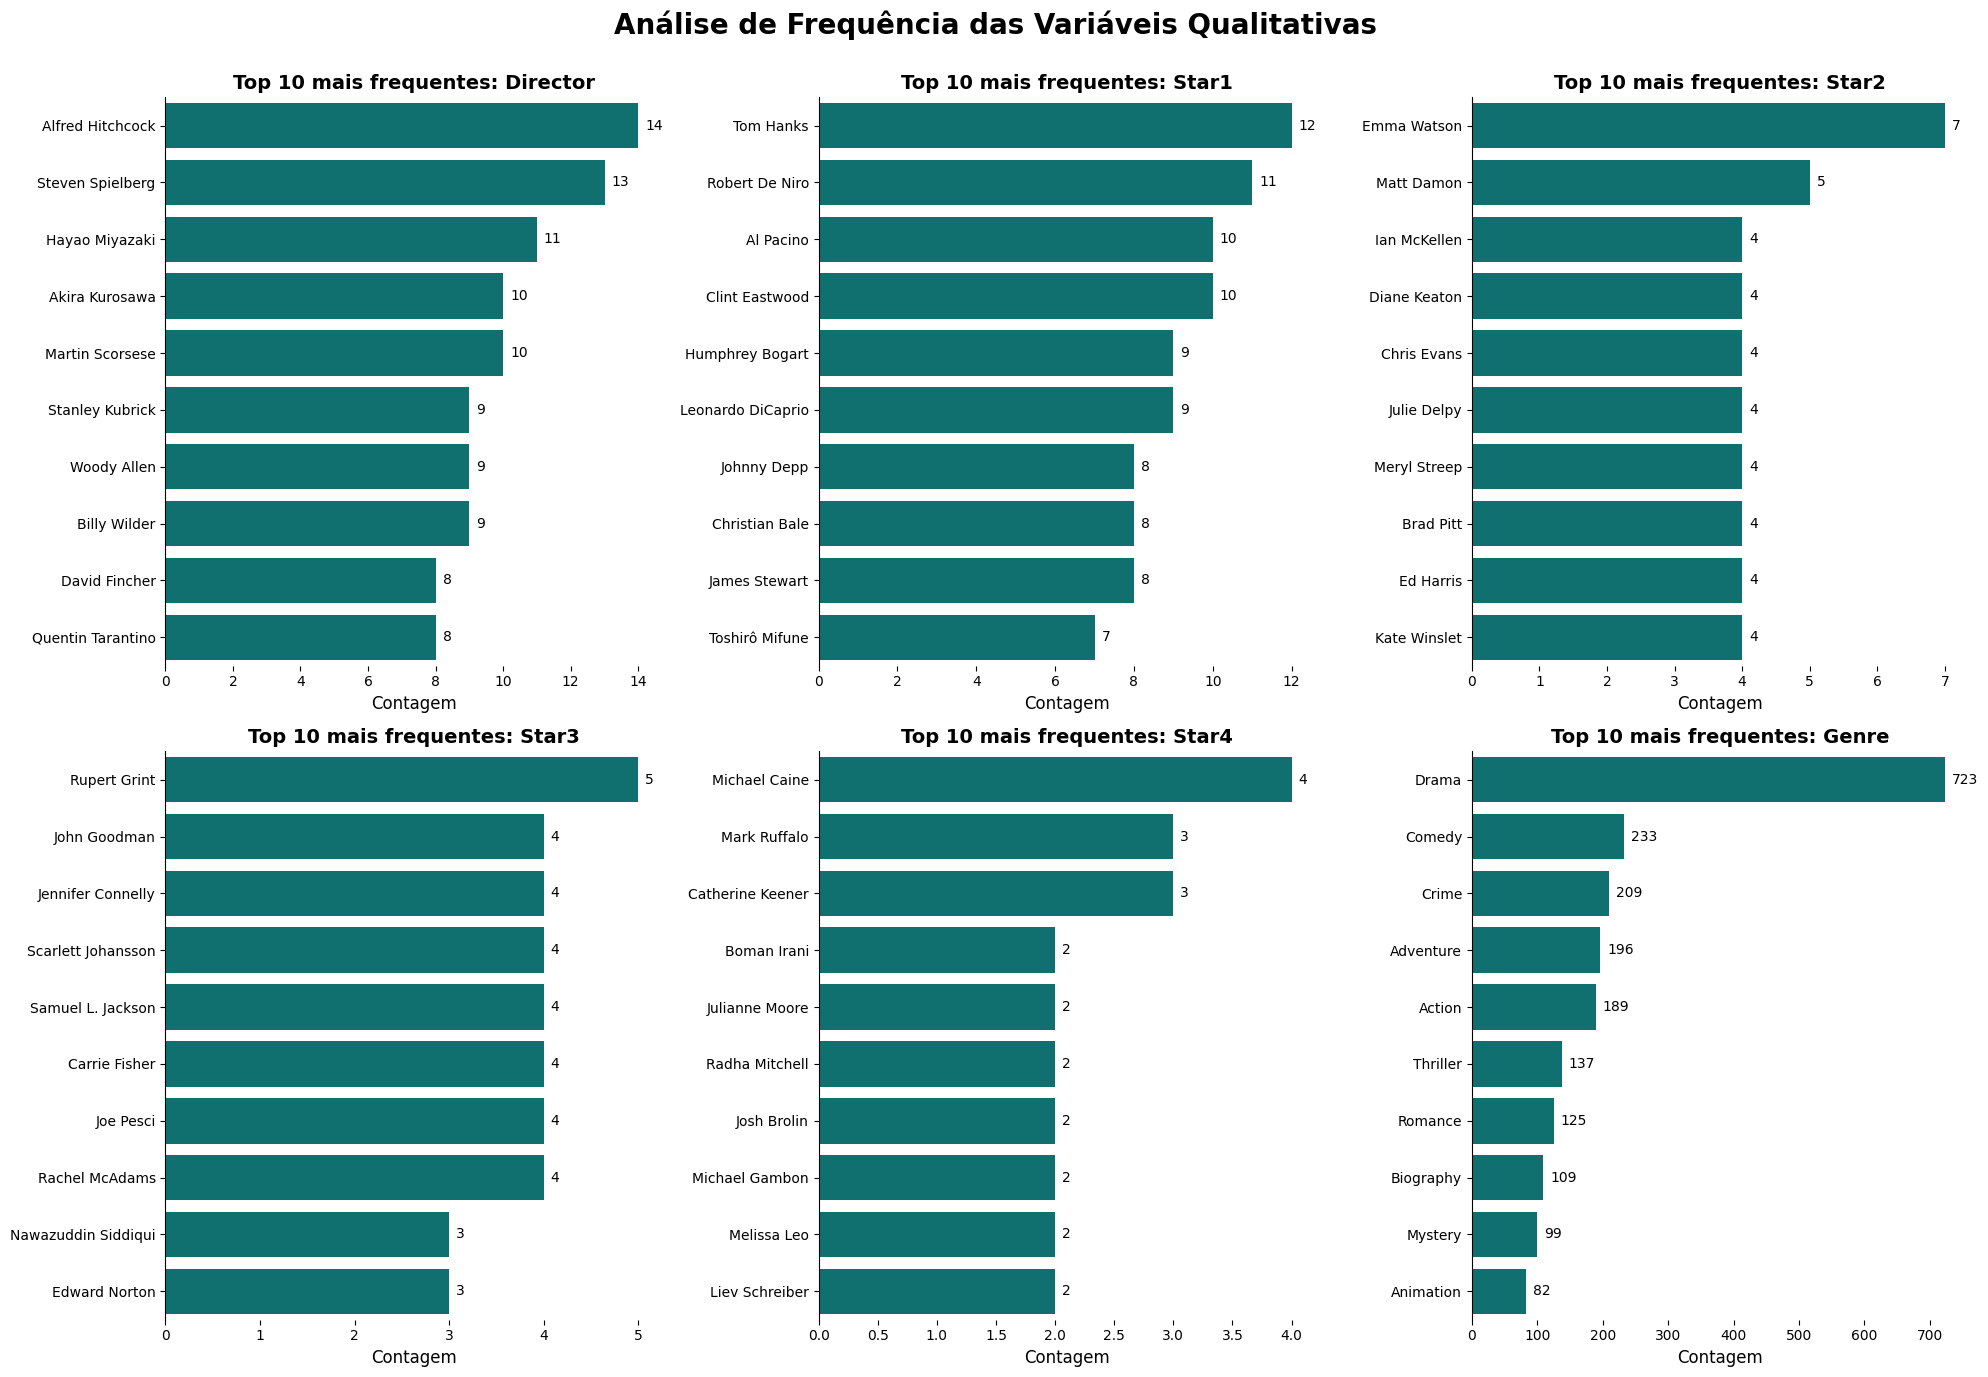

In [65]:
qualitativas = ['Director', 'Star1', 'Star2', 'Star3', 'Star4', 'Genre']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 14))
axes = axes.flatten()

for i, variavel in enumerate(qualitativas):
    if variavel == 'Genre':
        # Gênero usa get_dummies para contar as categorias por conta do one-hot-enconding
        frequencia = df[variavel].str.get_dummies(sep=', ').sum().sort_values(ascending=False).head(10)
    else:
        frequencia = df[variavel].value_counts().head(10)

    ax = sns.barplot(x=frequencia.values, y=frequencia.index, ax=axes[i], color='teal')
    ax.bar_label(ax.containers[0], fmt="%d", label_type="edge", padding=5)
    ax.set_title(f"Top 10 mais frequentes: {variavel}", fontsize=14, weight='bold')
    ax.set_xlabel("Contagem", fontsize=12)
    ax.set_ylabel("", fontsize=12)
    
    # bordas desnecessárias
    for side in ["bottom", "top", "right"]:
        ax.spines[side].set_visible(False)
    ax.spines["left"].set_color("black")

plt.suptitle("Análise de Frequência das Variáveis Qualitativas\n", fontsize=20, weight='bold')
plt.tight_layout()
plt.show()

---
 - O gênero Drama é o mais frequente (723), seguido por Comédia (253) e Crime (209)
 - A estrela 1 (Ator/Atriz 1) é a que possui mais atores frequentes com o seu primeiro lugar aparecendo 12 vezes enquanto o ator 2 mais frequente só aparece 7 vezes.
--- 

#### Análise das Variáveis Quantitativas

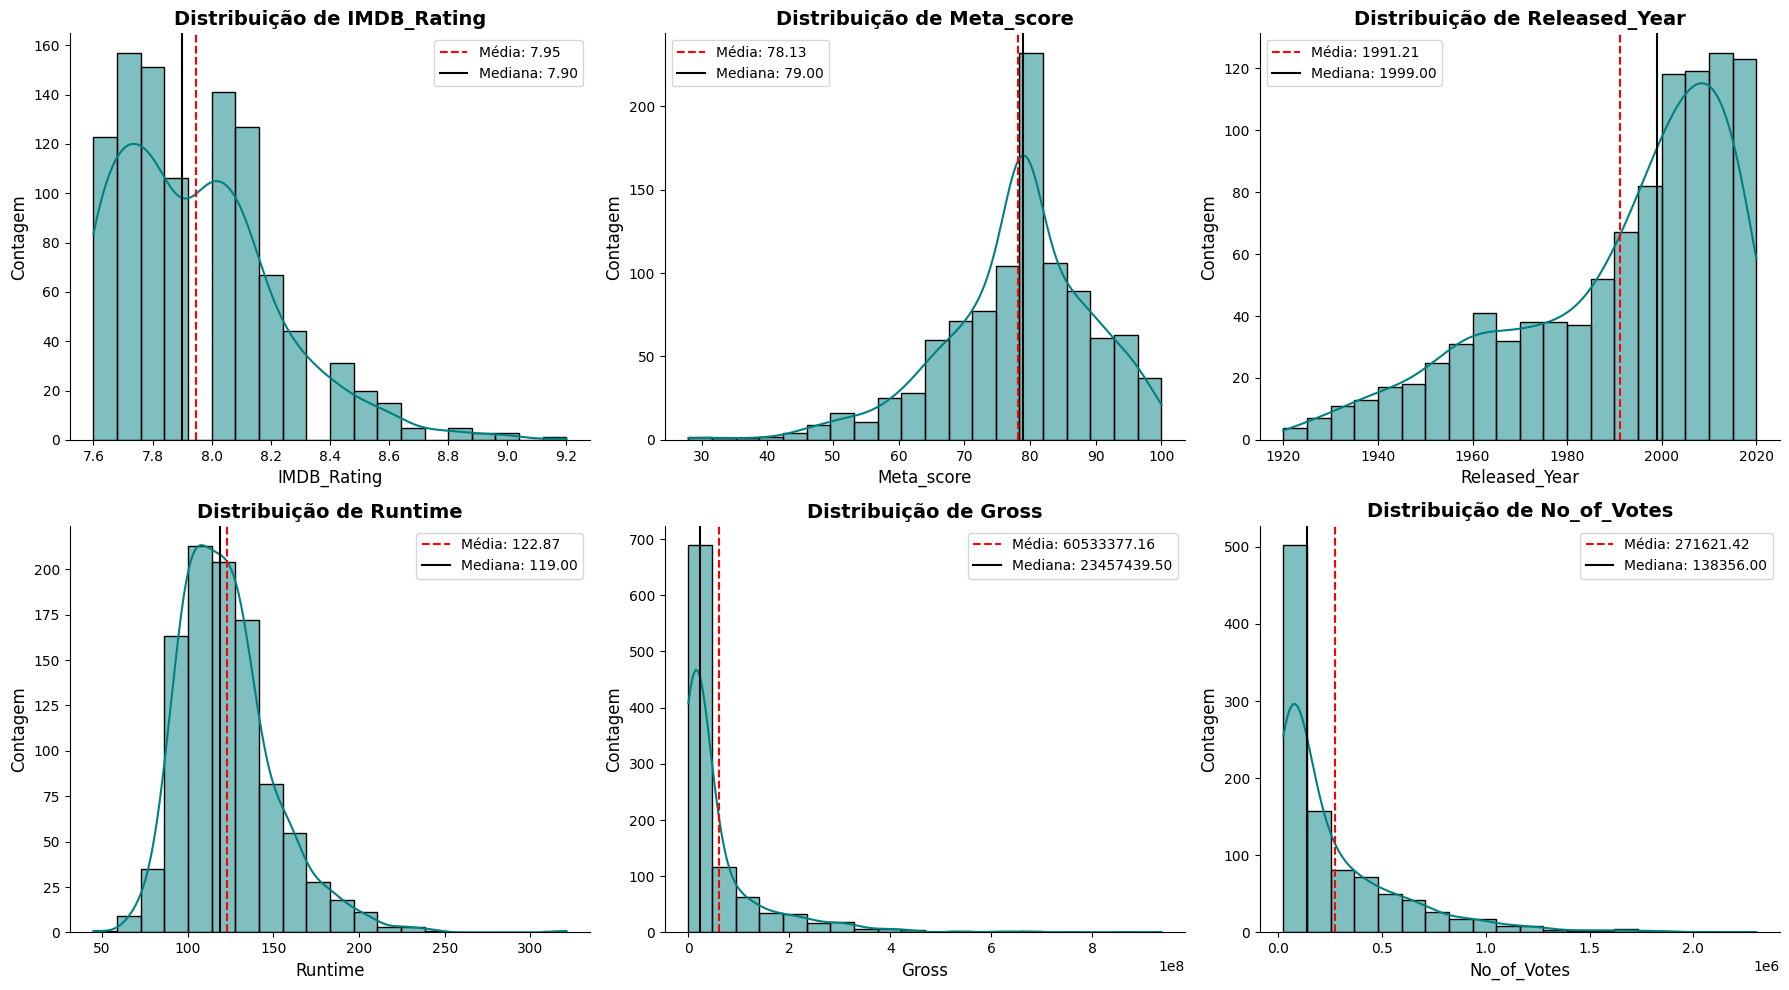

In [ ]:
quantitativas = ['IMDB_Rating', 'Meta_score', 'Released_Year', 'Runtime', 'Gross', 'No_of_Votes']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, variavel in enumerate(quantitativas):
    media_variavel = df[variavel].mean()
    moda_variavel = df[variavel].median()
    ax = sns.histplot(data=df, x=variavel, kde=True, ax=axes[i], color='teal', bins=20)
    ax.axvline(media_variavel, color='red', linestyle='--', label=f'Média: {media_variavel:.2f}')
    ax.axvline(moda_variavel, color='black', linestyle='-', label=f'Mediana: {moda_variavel:.2f}')
    ax.set_title(f"Distribuição de {variavel}", fontsize=14, weight='bold')
    ax.set_xlabel(variavel, fontsize=12)
    ax.set_ylabel("Contagem", fontsize=12)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.legend()

plt.tight_layout()
plt.show()

---
- Pode-se perceber que a média das notas do IMDB é de 7,95, com poucos filmes alcançando nota maior que 8,8. Enquanto isso, a média ponderada de todas as críticas é de 78,13 (em uma escala de 0 a 100), o que sugere que a opinião do público e da crítica está alinhada. A média do público se mostra ligeiramente mais favorável.
 - Apesar da média do ano de lançamento ser 1999, pode-se perceber que entre 2000 e 2020 houve um aumento na quantidade de filmes lançados.
 - O faturamento dos filmes (Gross) apresenta uma distribuição bastante assimétrica, com a média de aproximadamente 60,5 milhões e a mediana de 23,4 milhões. Essa diferença indica que um pequeno número de filmes obteve um faturamento muito alto, enquanto a maioria se concentra em valores menores, próximos à mediana.
 - O mesmo padrão de assimetria se repete com o número de votos. A média é puxada para valores mais altos por um grupo de filmes de grande sucesso, mas por não representarem a maioria, a mediana permanece no início do gráfico. Isso demonstra que a maioria dos filmes possui um número de votos significativamente menor.
--- 

#### Hipóteses

---
 - Existe uma relação direta entre o número de votos (No_of_Votes) e o faturamento (Gross)?
 - O gênero mais frequente (Drama) é o que possui o maior faturamento (Gross)?
 - Gêneros com maior número de votos tendem a ser mais lucrativos?
 - O faturamento de um filme tem alguma relação com o seu ano de lançamento? 
--- 

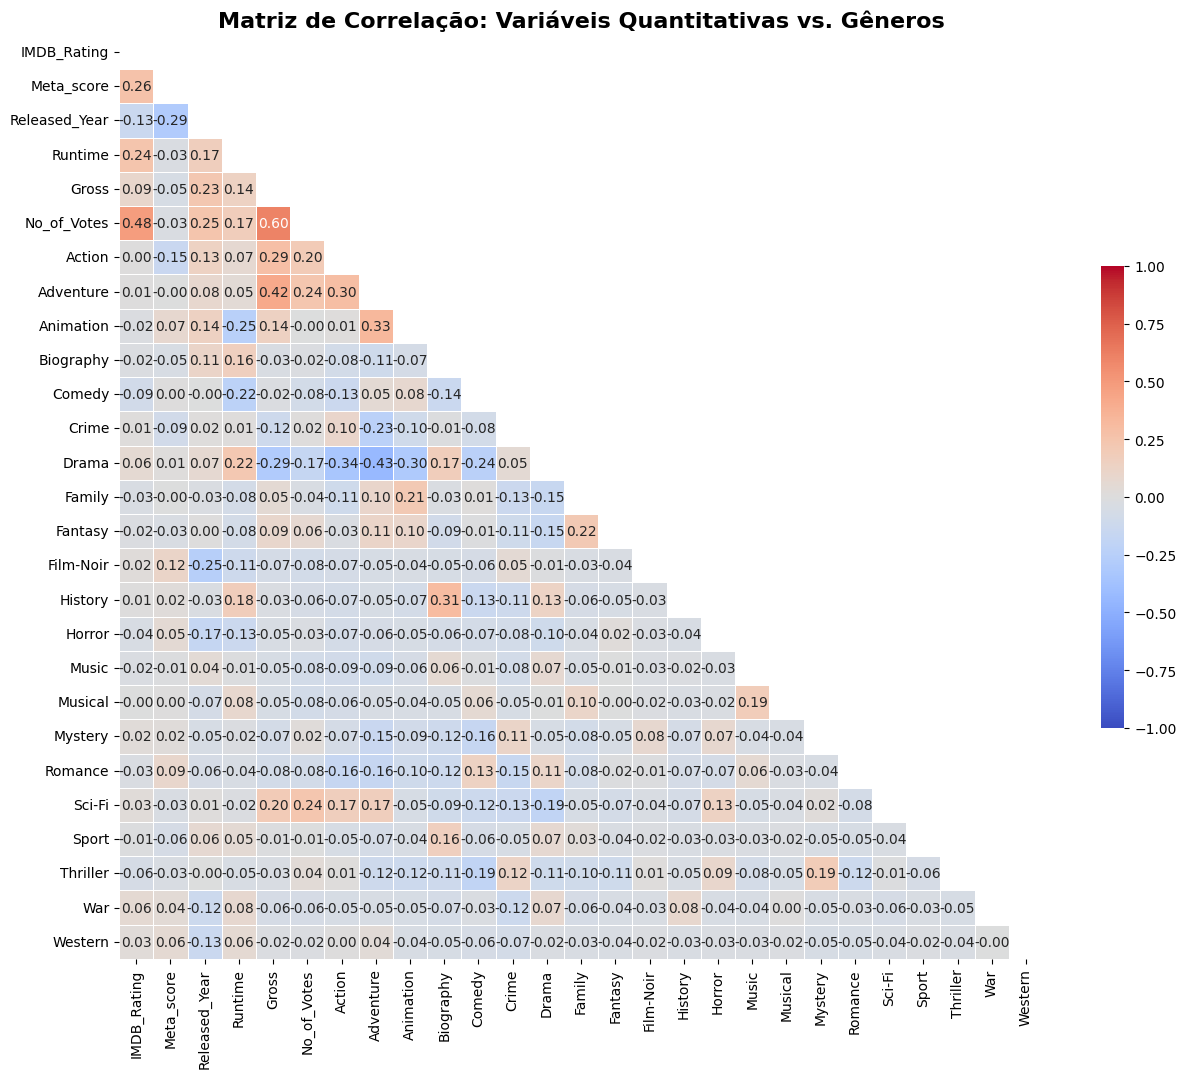

In [ ]:
colunas_de_genero = df.columns[df.columns.get_loc('Action'):]
colunas_focadas = quantitativas + list(colunas_de_genero)
df_foco = df[colunas_focadas]

# Matriz de correlação
corr = df_foco.corr()

#Matriz de máscara para esconder a parte superior do triângulo
mask = np.triu(np.ones_like(corr, dtype=bool))

# figura e o heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(
    corr, mask=mask,annot=True,fmt=".2f",cmap='coolwarm',vmax=1,vmin=-1,center=0,square=True,linewidths=.5,
    cbar_kws={"shrink": .5}
)

plt.title('Matriz de Correlação: Variáveis Quantitativas vs. Gêneros', fontsize=16, weight='bold')
plt.show()


---
 - O número de votos (No_of_Votes) e o faturamento (Gross) possuem uma correlação positiva de 0.60. Ou seja, há uma relação direta entre a popularidade de um filme (medida pelo número de votos) e seu sucesso financeiro.
 -  O número de votos (No_of_Votes) e o IMDB_Rating possuem uma correlação positiva de 0.48, logo a popularidade do filme e a sua nota do IMDB possuem uma correlação.
 - O gênero mais frequente (Drama) possui correlação  de -0.29 com o faturamento(Gross). Portanto, embora o gênero mais produzido seja drama, ele não está entre o mais lucrativos
 - O gênero mais lucrativo apresentado foi Aventura com uma correlação de 0.42 com o faturamento, seguido por ação com correlação de 0.29, indicando serem os gêneros mais lucrativos.
 - Os gêneros com maiores números de votos são: Aventura (0.24) e Ficção Ciêntifica (0.24), seguidos por Ação (0.20) que possuem correlação com o lucro de (0.42), (0.20), (0.29) respectivamente, os três são os gêneros com maior faturamento indicando que os gêneros com mais votos (mais populares) são os mais lucrativos.
 - O ano de lançamento tem uma correlação de (0.14) com o faturamento que indica correlção, mas não muito alta.
 - O ano de lançamento  tem uma correlação de (0.17) com o tempo de duração do filme, (0.25) com o número de votos e (0.24) com a nota do IMDB. Indicando que a interação e o engajamento do público com os filmes estão crescendo ao longo do tempo.
---